### Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as mtp  
from matplotlib import pyplot as plt
import pandas as pd 
import os

### Current Working Directory

In [2]:
cwd = os.getcwd()
data_file = os.path.join(cwd, 'data', 'Salary_data.csv')

### Get data

In [3]:
data_set = pd.read_csv(data_file)
data_set.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Here, Years of Experience is Independent variable whereas Salary is dependent variable

### Data Pre-processing

In [4]:
x= data_set.iloc[:, :-1].values  
y= data_set.iloc[:, 1].values   

In [5]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

Lets split the data into training and test dataset

In [7]:
from sklearn.model_selection import train_test_split  

In [8]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

### Fitting the Simple Linear Regression model to the training dataset 

Importing LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
regressor= LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

Here we trained the linear regression model using the training data. We reshape the x data to make it multi-dimensional array

The coefficient or slope(m)

In [11]:
regressor.coef_

array([9345.94244312])

The y-intercept(c)

In [12]:
regressor.intercept_

26816.19224403119

### Prediction of Training and Test set result

In [13]:
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)

Sidenote: reshape(row, column) -1 means all available. 

y_pred has prediction of salaries for test dataset of experience.
x_pred has prediction of salaries for train dataset of experience.

### Create a plot for training dataset

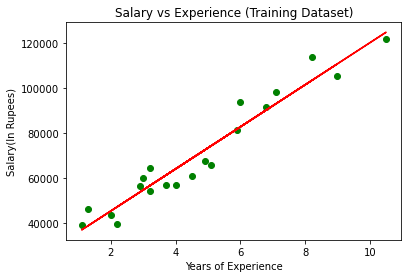

In [14]:
mtp.scatter(x_train, y_train, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("Salary vs Experience (Training Dataset)")  
mtp.xlabel("Years of Experience")  
mtp.ylabel("Salary(In Rupees)")  
mtp.show()  

### Create a plot for test dataset

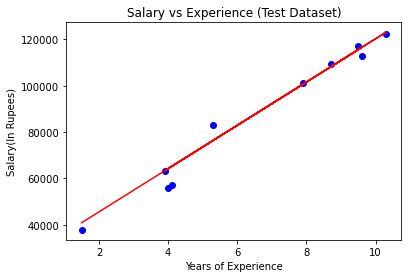

In [15]:
mtp.scatter(x_test, y_test, color="blue")   
mtp.plot(x_test, y_pred, color="red")    
mtp.title("Salary vs Experience (Test Dataset)")  
mtp.xlabel("Years of Experience")  
mtp.ylabel("Salary(In Rupees)")  
mtp.show() 

### Create a dataframe with years of experience(test values) and salary (predicted values)

In [16]:
prediction = pd.DataFrame({"Years of Experience": x_test.flatten(), "Salary": y_pred})
prediction.head()

,Years of Experience,Salary
0,1.5,40835.105909
1,10.3,123079.399408
2,4.1,65134.556261
3,3.9,63265.367772
4,9.5,115602.645454


Flatten converts the 2D array to 1D array


### Conclusion

We split the two variables into train and test set. We use train dataset to fit the regression model (fitting is training the model). Then, the regression line with data points were plotted to see how useful the regression line can be. Since the datapoints were closer to the regression line, the model seems fine. So we use the test values to predict the salary.

### Logistic Linear Regression

Current working directory

In [17]:
new_file = os.path.join(cwd, 'data', 'HR_comma_sep.csv')

Get data

In [18]:
df = pd.read_csv(new_file)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##### Introduction

From this data, we figure out what factors effect the employees leaving the organization. Then build logistic regression model using those variables

### DataFrame Exploration

In [19]:
left = df[df.left==1]
left.shape

(3571, 10)

In [20]:
stayed = df[df.left==0]
stayed.shape

(11428, 10)

#### Calculating mean value of all columns

In [21]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


 
* Here, we can see that employees who left have satisfaction level of 0.44 
* Also, they have greater average_monthly_hours (207.41)
* Finally, the promotion rate is also low(0.005) for those who left

#### Check if salary effects the employees leaving

<AxesSubplot:xlabel='salary'>

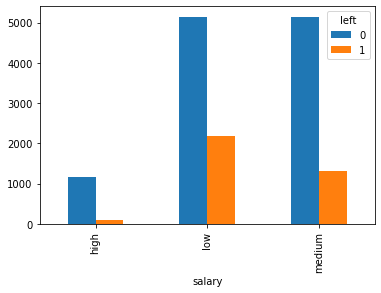

In [22]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

So it seems employees with higher salaries tend to stay

#### Check if department effects the employees leaving

<AxesSubplot:xlabel='Department'>

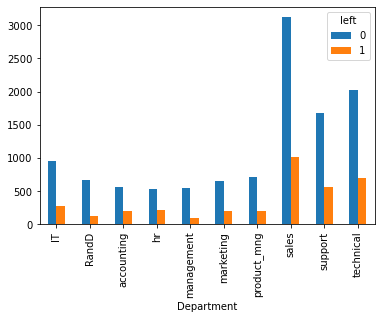

In [23]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

It shows that sales department has high leaving rate, but its number is high as well. So not much of a deciding factor.

#### The variables that effect the employees leaving the organization
* satisfaction_level
* average_monthly_hours
* promotion_last_5yrs
* salary

These can be used as independent variables while 'left' column is dependent variable.

In [24]:
new_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


#### Convert categorical variables to numerical using one hot encoding

In [25]:
salary_dummy = pd.get_dummies(new_df.salary, prefix='salary')
modified_df = pd.concat([new_df,salary_dummy],axis='columns')
modified_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Remove salary column

In [26]:
modified_df.drop('salary',axis='columns',inplace=True)
modified_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


#### Define X and Y variables

In [27]:
X = modified_df

In [28]:
Y = df.left

#### Split the data  to train and test data

In [29]:
from sklearn.model_selection import train_test_split  

In [30]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 1/3, random_state=0)

#### Import Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(max_iter=1000)

Training the model

In [33]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Evaluate the model

In [34]:
model.predict_proba(X_test)

array([[0.73505845, 0.26494155],
       [0.78450025, 0.21549975],
       [0.86869055, 0.13130945],
       ...,
       [0.90853955, 0.09146045],
       [0.87020283, 0.12979717],
       [0.87195774, 0.12804226]])

Here, first column represents that left=0 whereas second column represents that left=1

#### Check the accuracy of the model

In [35]:
model.score(X_test, Y_test)

0.7792

### Conclusion

Logistic Regression is used to model the probability of a discrete outcome given input variables. It obtains the odds ratio in the presence of more than one explanatory variable. We train the model with training data. Then we predict the probability of left being 0 and 1 using the test data. Then we check the model's accuracy which is 0.7792

### K-means Clustering

Here, we take Iris flowers dataset and try to form clusters of flowers using petal width and length features only.

Import necessary libraries

In [36]:
from sklearn.cluster import KMeans

Current Working Directory

In [37]:
cwd = os.getcwd()
iris_file = os.path.join(cwd, 'data', 'IRIS.csv')

Get data

In [38]:
iris = pd.read_csv(iris_file)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
iris.drop(['sepal_length', 'sepal_width', 'species'],axis='columns',inplace=True)
iris.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


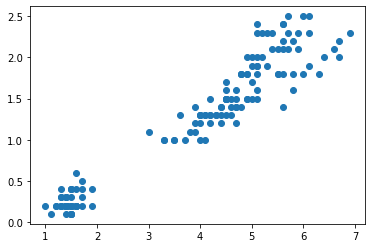

In [40]:
plt.scatter(iris['petal_length'], iris['petal_width'])

From the scatter plot, we can see that the data can have 2 clusters.

But, we need to find the exact value of k that fits the data. So, we use Elbow algorithm.

In [41]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(iris)
    sse.append(km.inertia_)

C:\Users\Omen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
sse

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 19.482389010989014,
 13.93330875790876,
 11.074566755272022,
 9.21026673204751,
 7.792119159008628,
 6.663104739704736]

We can see that SSE was very high initially, but it decreased gradually.

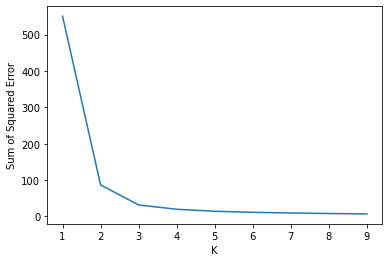

In [43]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)

We can see that the elbow is at 3. So it is best to take k=3 for maximum efficiency.

#### Create a model and predict

In [44]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(iris)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Now, we create a new column named cluster and append it to the dataframe.

In [45]:
iris['cluster'] = y_predicted
iris.head()

,petal_length,petal_width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


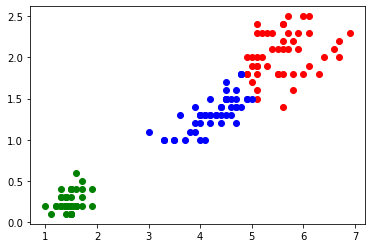

In [46]:
df1 = iris[iris.cluster==0]
df2 = iris[iris.cluster==1]
df3 = iris[iris.cluster==2]
plt.scatter(df1['petal_length'], df1['petal_width'], color='red')
plt.scatter(df2['petal_length'], df2['petal_width'], color='green')
plt.scatter(df3['petal_length'], df3['petal_width'], color='blue')

### Conclusion

Therefore, K-Means Clustering is unsupervised learning algorithm which is used to group data into clusters. Number of clusters that is best fit can be determined from Elbow method. Then, after a model is created, we split the dataframe based on number of clusters and their values. Then it becomes easier to plot the data showing all clusters.  

### KNN Algorithm

KNN is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure.

Get data

In [47]:
dataset = pd.read_csv(iris_file)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

Dividing the data to train and test data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

Now, we perform data scaling to standardize the independent features present in data

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Checking to see the n_neighbors value that seems best-fit for maximum accuracy

In [59]:
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    result = accuracy_score(y_test, y_pred)
    accuracy.append(result)


In [60]:
accuracy

[0.92, 0.94, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96]

Plotting the accuracy vs k value to see things clearer

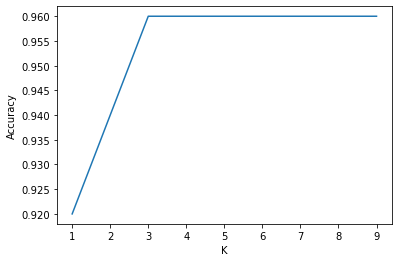

In [61]:
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_range, accuracy)

As we can see, the accuracy started increasing as value of k increases and it became constant after k=3. 

#### Create a model

We take the neighbors value as 3 since 3-10 has all same accuracy

In [62]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

Predict the test values using the classifier

In [63]:
y_pred = classifier.predict(X_test)

Print the results (classification_report, confusion_matrix,a ccuracy_score)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

Accuracy: 0.96


### Conclusion

So KNN Algorithm is basically a simple classification algorithm where data's actual y-value, or prediction is made based on nearest neighbors around the data. Usually, data with similar characteristics are grouped together, so if the data falls around the group, it is taken as part of the group/category.

Confusion Matrix is 3x3 because the classification has 3 classes (Iris-setosa, Iris-versicolor, Iris-virginica). The column represents predicted value whereas row represents actual value.